In [139]:
# original: https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/
import random
import numpy as np
from csv import reader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [140]:
# HINGE / MAX MARGIN
def get_hinge_prediction(w, x):
    score = get_max_margin_score(w, x)
    return np.argmax(score)

def get_hinge_score(w, x):
    return np.dot(w, x)

def get_hinge_loss(y, p):
    y = y*2 - 1
    return np.sum(np.maximum(0, 1 - np.multiply(y,p)))

def get_hinge_gradient(x, y, p):
    y = y*2 - 1
    gradient = -np.outer(y, x)
    gradient[np.multiply(y,p) > 1] = 0
    return gradient

hinge = {'prediction': get_hinge_prediction, 'score': get_hinge_score, 
         'loss': get_hinge_loss, 'gradient': get_hinge_gradient}

# LOGISTIC

def get_logistic_prediction(w, x):
    p = get_logistic_probs(w, x)
    return np.argmax(p)

def get_logistic_probs(w, x):
    exp_terms = np.exp(np.dot(w, x))    
    return exp_terms / sum(exp_terms)

def get_log_loss(y, p):
    return -np.dot(y, np.log(p))

def get_log_loss_gradient(x, y, p):
    return -np.outer(y - p, x)

logistic = {'prediction': get_logistic_prediction, 'score': get_logistic_probs, 
            'loss': get_log_loss, 'gradient': get_log_loss_gradient}

# SQUARE 

# BINARY 

In [141]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    return sum(actual == predicted) / float(len(actual)) * 100.0

# Estimate logistic regression coefficients using stochastic gradient descent
def sgd(train_x, train_y, lr, n_epoch, n_classes, alg):
    
    n_examples = len(train_y)
    x_dim = len(train_x[0])
    w = np.zeros((n_classes, x_dim))
    loss = np.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        shuffle = np.random.permutation(n_examples)
        train_x = train_x[shuffle]
        train_y = train_y[shuffle]
        
        for i in range(n_examples):
            x = train_x[i,:]
            y = np.zeros(n_classes)
            y[train_y[i]] = 1
            
            score = alg['score'](w, x)    
            loss[epoch] += alg['loss'](y, score)
            gradient = alg['gradient'](x, y, score)
            
            w -= lr * gradient
    return w, loss/n_examples

# Run SGD over the cross-validation split
def evaluate_split(train_x, train_y, test_x, lr, n_epoch, alg):    
    n_classes = len(np.unique(train_y))
    coef, loss = sgd(train_x, train_y, lr, n_epoch, n_classes, alg)
    
    train_predictions = list()
    test_predictions = list()
    for x in train_x:
        prediction = alg['prediction'](coef, x)
        train_predictions.append(prediction)
    for x in test_x:
        prediction = alg['prediction'](coef, x)
        test_predictions.append(prediction)
    return train_predictions, test_predictions, loss

# Evaluate an algorithm using a cross validation split
def evaluate(x, y, n_folds, lr, n_epoch, alg):
    fold_size = int(len(dataset) / n_folds)
    train_accuracy = list()
    test_accuracy = list()
    losses = list()
    for i in range(n_folds):
        idx = random.sample(range(len(y)), fold_size)
        train_x = x[idx]
        train_y = y[idx]
        test_x = np.delete(x, idx, axis=0)
        test_y = np.delete(y, idx, axis=0)

        train_predictions, test_predictions, loss = evaluate_split(train_x, train_y, test_x, lr, n_epoch, alg)
        train_accuracy.append(accuracy_metric(train_y, train_predictions))     
        test_accuracy.append(accuracy_metric(test_y, test_predictions))
        losses.append(loss)
    return train_accuracy, test_accuracy, losses

In [142]:
# DIABETES DATASET, BINARY
# load and prepare data
filename = 'datasets/pima-indians-diabetes.csv'
dataset = np.genfromtxt(filename, delimiter=',')
np.array(dataset).astype(float)
split = np.split(dataset, [-1], axis=1)
x = np.insert(split[0], 0, 1, axis=1)
y = np.ndarray.flatten(split[1]).astype(int)

# normalize
x = MinMaxScaler().fit_transform(x)

# evaluation parameters
n_folds = 5
lr = 0.05
n_epoch = 500

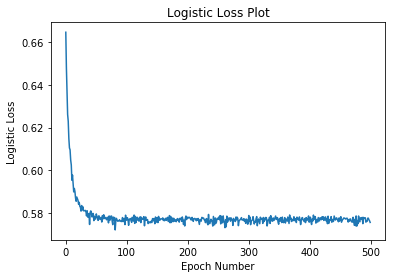

Mean Training Accuracy for Logistic Loss: 71.503%
Mean Testing Accuracy for Logistic Loss: 65.626%
Baseline accuracy for Logistic Loss: 77.214%


In [102]:
# logistic loss
train_accuracy, test_accuracy, loss = evaluate(x, y, n_folds, lr, n_epoch, logistic)
plt.plot(np.mean(loss, axis=0))
plt.title("Logistic Loss Plot")
plt.ylabel("Logistic Loss")
plt.xlabel("Epoch Number")
plt.show()

LR = LogisticRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

print('Mean Training Accuracy for Logistic Loss: %.3f%%' % np.mean(train_accuracy))
print('Mean Testing Accuracy for Logistic Loss: %.3f%%' % np.mean(test_accuracy))
print("Baseline accuracy for Logistic Loss: %.3f%%" % accuracy_metric(y, y_pred))

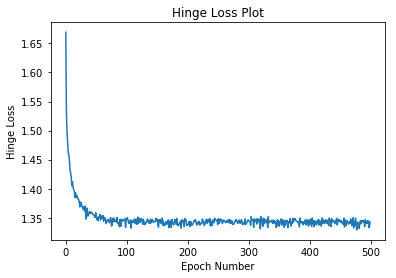

Mean Training Accuracy for Hinge Loss: 72.157%
Mean Testing Accuracy for Hinge Loss: 66.764%
Baseline accuracy for Hinge Loss: 76.693%


In [143]:
# hinge / max margin loss
train_accuracy, test_accuracy, loss = evaluate(x, y, n_folds, lr, n_epoch, hinge)
plt.plot(np.mean(loss, axis=0))
plt.title("Hinge Loss Plot")
plt.ylabel("Hinge Loss")
plt.xlabel("Epoch Number")
plt.show()

svc = SVC()
svc.fit(x,y)
y_pred = svc.predict(x)

print('Mean Training Accuracy for Hinge Loss: %.3f%%' % np.mean(train_accuracy))
print('Mean Testing Accuracy for Hinge Loss: %.3f%%' % np.mean(test_accuracy))
print("Baseline accuracy for Hinge Loss: %.3f%%" % accuracy_metric(y, y_pred))

In [144]:
# LETTER RECOGNITION, MULTICLASS

# load and prepare data
filename = 'datasets/letter-recognition.csv'
dataset = np.genfromtxt(filename, delimiter=',', dtype='<U3')

split = np.split(dataset, [1], axis=1)
x = np.insert(split[1], 0, 1, axis=1).astype('float')
x = MinMaxScaler().fit_transform(x)

convert_to_num = np.vectorize(ord)
y = convert_to_num(np.ndarray.flatten(split[0])) - ord('A')
if min(y) != 0:
    y -= min(y)

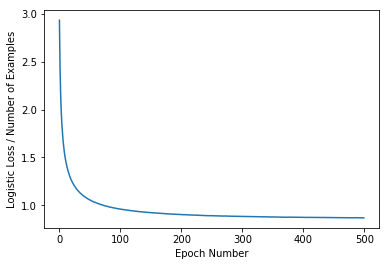

Mean Training Accuracy: 76.935%
Mean Testing Accuracy: 74.737%
Baseline accuracy: 71.505%


In [146]:
train_accuracy, test_accuracy, loss = evaluate(x, y, n_folds, lr, n_epoch, logistic)
plt.plot(np.mean(loss, axis=0))
plt.title("Logistic Loss Plot")
plt.ylabel("Logistic Loss")
plt.xlabel("Epoch Number")
plt.show()

LR = LogisticRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

print('Mean Training Accuracy: %.3f%%' % np.mean(train_accuracy))
print('Mean Testing Accuracy: %.3f%%' % np.mean(test_accuracy))
print("Baseline accuracy: %.3f%%" % accuracy_metric(y, y_pred))

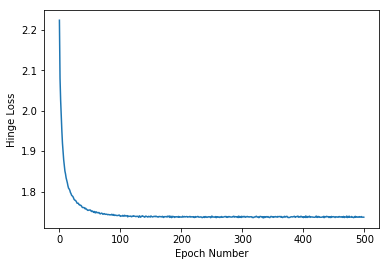

Mean Training Accuracy for Hinge Loss: 62.900%
Mean Testing Accuracy for Hinge Loss: 61.556%
Baseline accuracy for Hinge Loss: 75.530%


In [147]:
train_accuracy, test_accuracy, loss = evaluate(x, y, n_folds, lr, n_epoch, hinge)
plt.plot(np.mean(loss, axis=0))
plt.title("Hinge Loss Plot")
plt.ylabel("Hinge Loss")
plt.xlabel("Epoch Number")
plt.show()

svc = SVC()
svc.fit(x,y)
y_pred = svc.predict(x)

print('Mean Training Accuracy for Hinge Loss: %.3f%%' % np.mean(train_accuracy))
print('Mean Testing Accuracy for Hinge Loss: %.3f%%' % np.mean(test_accuracy))
print("Baseline accuracy for Hinge Loss: %.3f%%" % accuracy_metric(y, y_pred))